In [162]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch
from sklearn.datasets import load_boston

In [163]:
boston=load_boston()

In [164]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [165]:
x_data=boston.data
y_data=boston.target

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)
x=torch.from_numpy(x_train).type(torch.float32)
y=torch.from_numpy(y_train).type(torch.float32)
xt=torch.from_numpy(x_test).type(torch.float32)
yt=torch.from_numpy(y_test).type(torch.float32)




In [168]:
layers=[13,50,100,50,1]


In [169]:
y=y.reshape(-1,1)
yt=yt.reshape(-1,1)


In [170]:
from torch import nn
from torch.nn import functional as F

In [171]:
model=nn.Sequential(nn.Linear(13,50),
                    nn.ReLU(),
                    nn.Linear(50,100),
                    nn.Dropout(p=0.2),
                    nn.ReLU(),
                    nn.Linear(100,50),
#                     nn.Dropout(p=0.3),
                    nn.ReLU(),
                    nn.Linear(50,1))

In [172]:
params=model.parameters()
optims=torch.optim.Adam(params,lr=0.03)

In [175]:
epochs=2300;
train_err=[]
test_err=[]
for i in range(epochs):
    yp=model(x)
    error=F.mse_loss(yp,y)
    optims.zero_grad()
    error.backward()
    optims.step()
    if(i%100==0):
        print("*"*20,"Epoch :",i,"*"*20)
        print("Train error : ",error)
        train_err.append(float(error))
        ytp=model(xt)
        errort=F.mse_loss(ytp,yt)
        test_err.append(float(errort))
        print("Test error : ",errort)
        
        
    
    
    
    
    

******************** Epoch : 0 ********************
Train error :  tensor(12.3207, grad_fn=<MseLossBackward>)
Test error :  tensor(12.3026, grad_fn=<MseLossBackward>)
******************** Epoch : 100 ********************
Train error :  tensor(12.9631, grad_fn=<MseLossBackward>)
Test error :  tensor(12.3925, grad_fn=<MseLossBackward>)
******************** Epoch : 200 ********************
Train error :  tensor(11.4949, grad_fn=<MseLossBackward>)
Test error :  tensor(10.9811, grad_fn=<MseLossBackward>)
******************** Epoch : 300 ********************
Train error :  tensor(18.6035, grad_fn=<MseLossBackward>)
Test error :  tensor(15.7002, grad_fn=<MseLossBackward>)
******************** Epoch : 400 ********************
Train error :  tensor(17.9869, grad_fn=<MseLossBackward>)
Test error :  tensor(27.4117, grad_fn=<MseLossBackward>)
******************** Epoch : 500 ********************
Train error :  tensor(16.0989, grad_fn=<MseLossBackward>)
Test error :  tensor(13.1381, grad_fn=<MseLos

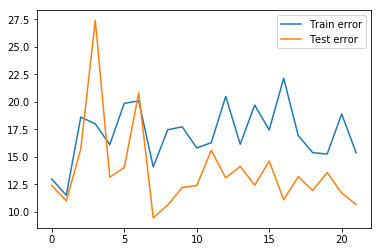

In [176]:
plt.plot(train_err[1:])
plt.plot(test_err[1:])
plt.legend(["Train error","Test error"])

tensor([[ 6.0977],
        [ 7.7939],
        [ 6.1753],
        [ 6.5567],
        [ 8.3024],
        [ 8.3444],
        [ 6.1913],
        [ 7.7617],
        [ 6.1150],
        [ 5.5887],
        [ 5.9834],
        [ 9.1315],
        [ 6.3735],
        [ 9.5358],
        [ 7.3552],
        [11.5366],
        [ 5.9263],
        [ 7.4767],
        [ 9.1084],
        [ 7.6297],
        [ 4.8580],
        [ 3.6328],
        [ 6.2685],
        [ 5.5175],
        [ 7.6828],
        [ 8.3445],
        [ 4.2389],
        [ 5.4790],
        [ 5.3891],
        [ 5.8049],
        [ 6.7437],
        [ 8.0393],
        [ 7.3823],
        [ 8.2403],
        [ 6.6207],
        [ 7.5701],
        [ 7.7720],
        [11.5642],
        [ 7.8890],
        [11.0151],
        [ 5.6110],
        [ 7.8506],
        [ 4.3733],
        [ 6.2871],
        [ 6.0373],
        [ 5.9554],
        [ 5.5330],
        [ 7.8468],
        [ 5.7755],
        [ 6.4883],
        [10.0596],
        [ 8.0191],
        [ 6.